<a href="https://colab.research.google.com/github/ripky/OFA/blob/main/data_distribusi_inferensial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan 

Misalkan kamu adalah data scientist di gojek. Kamu ingin mengetahui apakah kemacetan mempengaruhi tingkat kepuasan pelanngan.

Kamu diminta unutk membandingkna nilai "bintang" dari customer setalah dia order

macet = [2, 3, 5, 4, 4, 2, 2, 2]
tidak macet = [ 4 , 3, 5, 4 , 4, 5,5]

Tugas
1. Buat hipotesa
2. Lakukan uji asumis normaltias
3. Jika datanya normal, lakukan uji paramterik
4. jika datanya tidak nrmal lakukan uji non parametrik
5. kesimpulan?

Uji Normalitas

Ho =  Data berdistribusi normal

Ha = data tidak berdistribusi normal

In [2]:
#import library
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [1]:
#list data 
macet = [2, 3, 5, 4, 4, 2, 2, 2]
tidak_macet = [ 4 , 3, 5, 4 , 4, 5,5,6]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


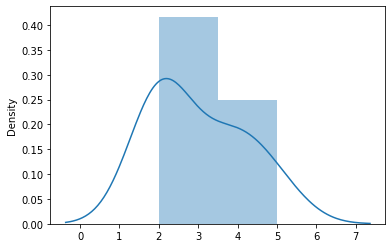

In [3]:
# Dengan Histogram saat pembelajaran offline
sns.distplot(macet)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


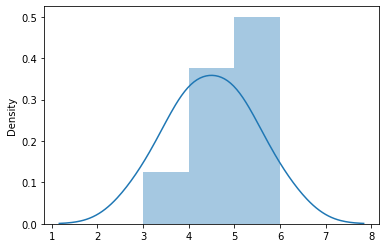

In [4]:
# Dengan Histogram saat pembelajaran online
sns.distplot(tidak_macet)

In [12]:
#UJI KOLMOGORV-SMIRNOV -> MENENTUKAN APAKAH DATA INI BERDISTRIBUSI NORMAL ATAU TIDAK

z_score_macet = stats.zscore(macet)
z_score_tidak_macet = stats.zscore(tidak_macet)

In [13]:
print("Stats of data offline ", stats.kstest(z_score_macet, "norm"))
print("Stats of data online ", stats.kstest(z_score_tidak_macet, "norm"))

Stats of data offline  KstestResult(statistic=0.3144533152386512, pvalue=0.3355485604492315)
Stats of data online  KstestResult(statistic=0.21814856917461345, pvalue=0.8409800707631647)


In [14]:
#uji shapiro wilk
stats.shapiro(macet)

(0.8148126602172852, 0.04114428907632828)

In [15]:
stats.shapiro(tidak_macet)

(0.9306909441947937, 0.5223854780197144)

dari hasil kolmogorov smirnov didapat bahwa nilai pvalue dari kedua variabel
 
lebih dari 0.05 maka dapat dibuktikan bahwa kedua variabel berdistribusi normal

In [16]:
len(macet)

8

In [17]:
len(tidak_macet)

8

In [18]:
#uji Paired Sample - Test (Paramterik)
t_value = stats.ttest_rel(macet, tidak_macet)

print('Hasil uji t : ', t_value)

Hasil uji t :  Ttest_relResult(statistic=-2.5099800796022267, pvalue=0.040398095491595926)


In [19]:
stats.mannwhitneyu(macet, tidak_macet)

MannwhitneyuResult(statistic=11.0, pvalue=0.013177991220864665)

In [23]:
from google.colab import files
upload = files.upload()
upload

Saving final_exam.csv to final_exam.csv


{'final_exam.csv': b'big_west,small_west,capital_city,big_east,small_east\r\n87,77,86,71,70\r\n75,83,90,82,76\r\n80,73,87,85,81\r\n75,82,85,89,85\r\n91,71,85,72,75\r\n89,87,96,79,75\r\n91,77,95,79,75\r\n87,84,89,85,72\r\n90,86,93,84,72\r\n94,93,91,86,75\r\n82,83,96,85,90\r\n91,94,94,76,83\r\n83,79,91,71,80\r\n86,92,85,82,85\r\n84,72,77,72,80\r\n82,86,96,78,80\r\n88,76,84,78,78\r\n89,84,87,76,86\r\n94,85,91,74,83\r\n87,93,83,77,77\r\n89,87,90,74,76\r\n88,89,81,70,75\r\n75,89,79,80,81\r\n85,77,95,89,74\r\n81,92,93,80,84\r\n78,73,95,89,75\r\n93,86,90,77,75\r\n88,87,91,88,80\r\n84,93,78,75,80\r\n90,95,91,78,75\r\n91,90,88,82,70\r\n88,84,80,72,80\r\n82,82,95,77,90\r\n94,82,94,81,86\r\n83,93,90,75,70\r\n91,72,78,78,85\r\n76,85,89,75,80\r\n80,90,90,87,72\r\n76,81,90,76,90\r\n90,90,95,81,90\r\n88,78,81,89,63\r\n84,83,90,82,82\r\n70,70,70,70,70'}

# Uji Beda lebih dari kelompok

Dalam statistik paramterik (ANOVA), memiliki 2 asumsi:
1. Data berdistribusi normla
2. Varians data homogen


Kasus

Misalkan saat ini kamu adalah mentri pendidikan yang ingin mengetahui apakah kualitas pendidikan di negara sudah merata atau belum. 

Daerah dibagi menjadi 
1. kota besar di wilayah barat
2. kota kecil di wilayah barat
3. ibukota
4. kota besar di wilayah timur
5. kota kecil di wilayah timur

In [26]:
final_exam = pd.read_csv('final_exam.csv')
final_exam

,big_west,small_west,capital_city,big_east,small_east
0,87,77,86,71,70
1,75,83,90,82,76
2,80,73,87,85,81
3,75,82,85,89,85
4,91,71,85,72,75
5,89,87,96,79,75
6,91,77,95,79,75
7,87,84,89,85,72
8,90,86,93,84,72
9,94,93,91,86,75


## Uji Normalitas

Ho = data berdistribusi normal

ha = data tidak berdistribusi normal

<Figure size 1280x960 with 0 Axes>

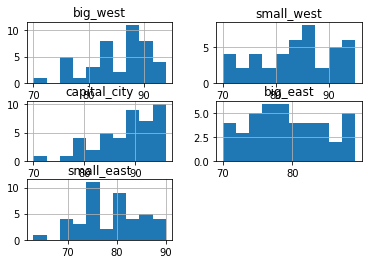

In [27]:
#membuat histogram
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)
final_exam.hist()
plt.show()

In [28]:
area = ['big_west', 'small_west', 'capital_city', 'small_east', 'big_east']

for a in area:
  z_score = stats.zscore(final_exam[a])
  stat = stats.kstest(z_score, "norm")
  print('stat ', a, ' = ', stat)

stat  big_west  =  KstestResult(statistic=0.1463623852887705, pvalue=0.2875537193189711)
stat  small_west  =  KstestResult(statistic=0.09305748870693209, pvalue=0.8504695155077621)
stat  capital_city  =  KstestResult(statistic=0.1723544820281414, pvalue=0.13793715190373557)
stat  small_east  =  KstestResult(statistic=0.11522951440351409, pvalue=0.5926673369890815)
stat  big_east  =  KstestResult(statistic=0.09709346617838455, pvalue=0.8123161041508566)


Apakah data berdistiribusi normal ? Ya, karena semua p-value > 0.05

## Uji Homogenitas

Ho = varians semua kelompok cenderung homogen

Ha = varians semua kelompok cenderung heterogen

In [29]:
stats.levene(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'], final_exam['big_east'], final_exam['small_east'])

LeveneResult(statistic=0.5104303607286809, pvalue=0.728125042716542)

## Uji ANOVA

Ho =  Kualias pendidiakn merata

ha = kualitas pendidikan tidak merata

In [30]:
stats.f_oneway(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'], final_exam['big_east'], final_exam['small_east'])

F_onewayResult(statistic=18.48895253915249, pvalue=4.945434101915241e-13)

Karena p_value < 0.05, maka Ho ditolak, ternyata kualtias pendidikan tidak merata

In [31]:
final_exam.describe()

,big_west,small_west,capital_city,big_east,small_east
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,85.325581,83.837209,88.232558,79.209302,78.627907
std,5.982995,7.006562,6.159921,5.667611,6.302015
min,70.000000,70.000000,70.000000,70.000000,63.000000
25%,82.000000,78.500000,85.000000,75.000000,75.000000
50%,87.000000,84.000000,90.000000,78.000000,80.000000
75%,90.000000,89.500000,93.000000,83.000000,83.000000
max,94.000000,95.000000,96.000000,89.000000,90.000000


## Uji Kruskal-Wallis (Non paramterik)

Jika datanya tidak distribusi normal

In [32]:
stats.kruskal(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'], final_exam['big_east'], final_exam['small_east'])

KruskalResult(statistic=57.244594069662135, pvalue=1.0992920086269013e-11)